<a href="https://colab.research.google.com/github/clm7373/Summer2020R_Masters/blob/master/Copy_of_clustering_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework for Clustering Analysis
The **MNIST** (Mixed National Institute of Standards and Technology) database contains 60000 training examples and 10000 testing examples of handwritten digit images.  Due to its popularity in performance testing, it has been recognized as "the Drosophila of machine learning". In this assignment, we ask you to apply some clustering methods to a subset (n=1000) of the MNIST data.  

Each sample contains 784 integers ranging from $0$ to $255$, representing intensity value of a $28 \times 28$ image, one number for one pixel. To conveniently run the clustering functions, the square pixel matrix is flattened into the row vector, from left to right, top to bottom, with the first element of the vector corresponds to the upper left pixel. The label vector is a 1000-element array containing the true class of the samples.

In [ ]:
from tensorflow.keras.datasets import mnist
_ , (dat, lab) = mnist.load_data()  # use the first 1000 images in the test set of MNIST

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
dat.shape

(10000, 28, 28)

In [ ]:
dat = dat[0:1000,:,:].reshape((1000, 28*28))  # flatten the image for the convenient of downstream analysis
lab = lab[0:1000]

In [ ]:
print(f'Data dimension: {dat.shape}')
print(f'First 10 labels: {lab[0:10]}')

Data dimension: (1000, 784)
First 10 labels: [7 2 1 0 4 1 4 9 5 9]


Please feel free to use your favorite programming language. Most (if not all) algorithms and procedures mentioned here have existing implementations in Python, R and Matlab.

If you want to run the analysis on your local machine, you can download the tab-delimited files `dat.txt` and `lab.txt` from the homework folder. 

Once the data are ready, we can quickly try visualizing a digit image:

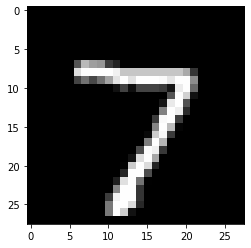

In [ ]:
import matplotlib.pyplot as plt
im = dat[0,:]
im = im.reshape((28, 28))
plt.imshow(im, cmap='gray')

Here are the questions:

1. Subset the data and only keep examples whose true labels are 0 or 1 (there should be 211 of them in total). Run hierarchical clustering on this subset with Euclidean distance as dissimilarity measure. Plot the dendrogram for single, complete and average linkages. 



2. For the three dengrograms obtained in question 1, cut each tree and obtain two-group assignments. Produce contingency tables for each assignment compared to the true labels. Which linkage performs the best?



3. **With the subset of $0$s and $1$s**, calculate the Gap statistic for K-means clustering with $k$ ranging from $1$ to $10$. You can choose your own Monte Carlo sample numbers if you want to (in the R and Matlab functions this is set to 100 by default), and use uniform over principle conponents as the reference distribution. Which $k$ value has the largest Gap statistic? Does this make sense to you? If not, could you make some speculations about why it is the case?


4. Run the K-means algorithm with $k=10$ to cluster **all of the 1000 images**  into 10 groups. You may want to run mutiple times with random initiation and pick a solution with the smallest within-cluster sum of squares. Visualize the cluster centers (centroids) as ten $28 \times 28$ images. 

5. Try DBSCAN algorithm on the 1000 digits with Pearson correlation distance as the dissimilarity measure. For density clustering, it is helpful to look at the distribution of k-nearest neighbor distance in the data. Here we try k=5. 

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances
dist = pairwise_distances(dat, metric='correlation')

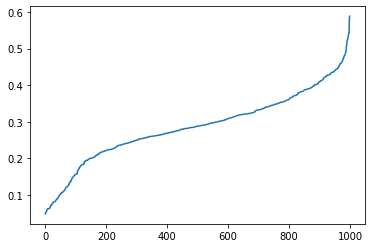

In [ ]:
knn = np.sort(dist, axis=0)[4,:]
knn = np.sort(knn)
plt.plot(knn)

Run DBSCAN with $\epsilon = 0.5$ and minimal number of samples in neiboughhood as 5. How many clusters do you get? Again, does this result make sense to you? If not, any thoughts why?